<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/mfikad-DWWP.3/blob/master/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the necessary modules**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Load the Data Set**

In [2]:
dataFrame = pd.read_csv('/content/coursea_data.csv')

**Remove the first column named 'Unnamed' to remove unwanted columns**

In [3]:
dataFrame = dataFrame.drop("Unnamed: 0",axis=1)

**Check if data has missing values**

In [4]:
dataFrame.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

**Check if the data has any duplicates**

In [5]:
dataFrame.duplicated().sum()

0

**Convert the enrolled students column to a number value**

In [6]:
dataFrame['course_students_enrolled'] = dataFrame['course_students_enrolled'].str[:-1].astype(float)

**Describe the Dataframe**

In [7]:
dataFrame.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487


# Visualization Part

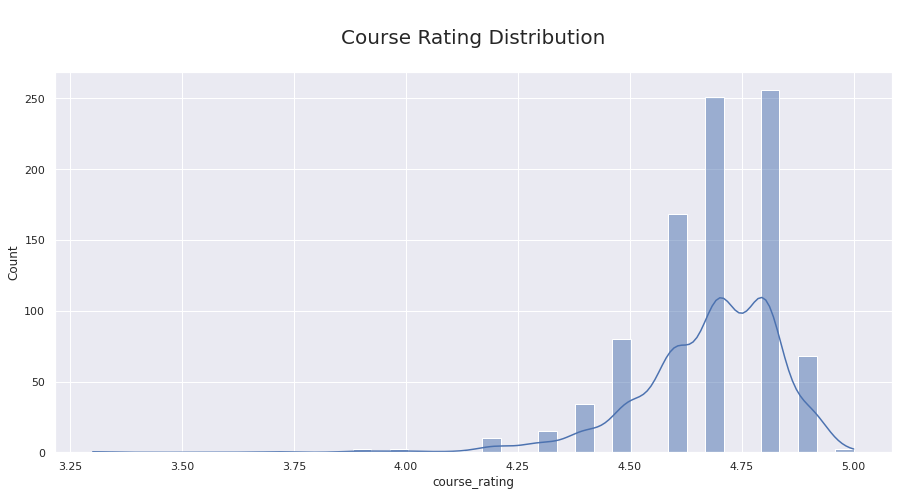

In [8]:
sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(dataFrame['course_rating'], kde=True)
plt.title("\nCourse Rating Distribution\n",fontsize=20)
plt.show()

Here we can see that most of the courses have a rating between 4.5 and 5.00

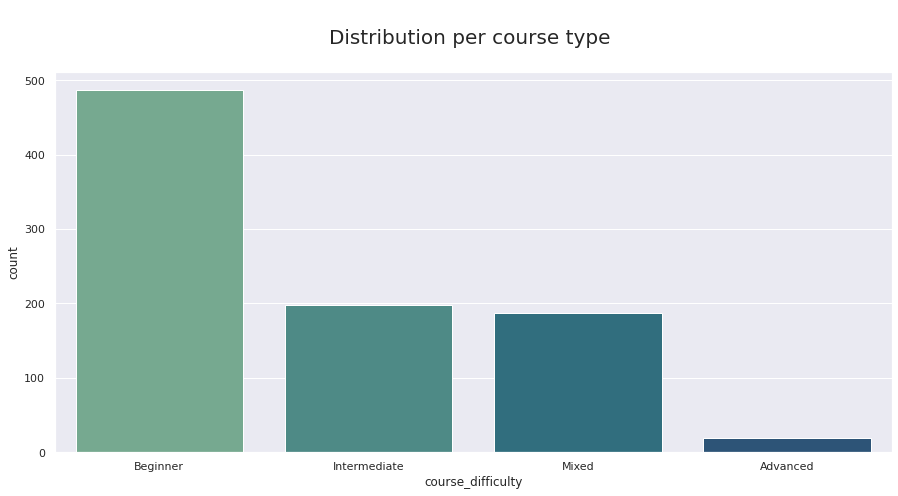

In [9]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot( x="course_difficulty", data=dataFrame, palette="crest")
ax.axes.set_title("\nDistribution per course type \n",fontsize=20)
plt.show()

Most students are enrolled in Beginner courses than any other, and advanced couses have a much smaller number of students as compared to the others.

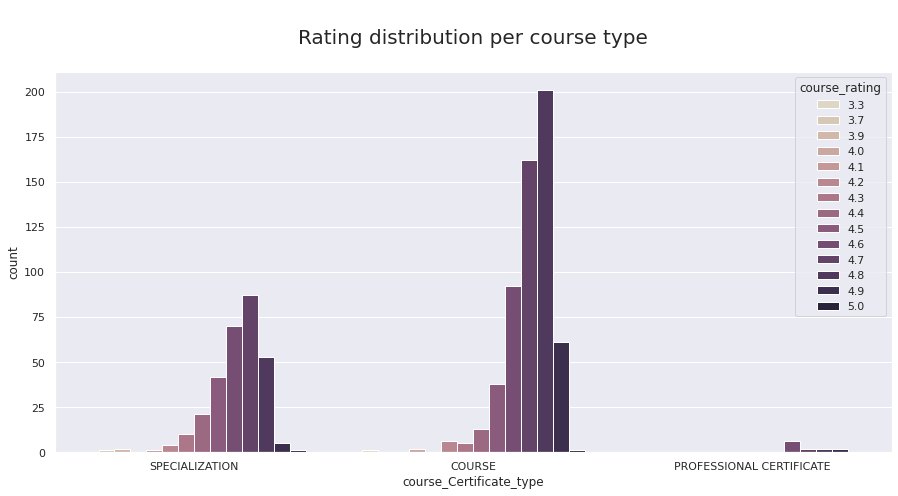

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(hue="course_rating", x="course_Certificate_type", data=dataFrame,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nRating distribution per course type\n",fontsize=20)
plt.show()

Both specialization and course certificate types have a similar rating distribuation eventhough course certificate types have a smaller number of frequency. 

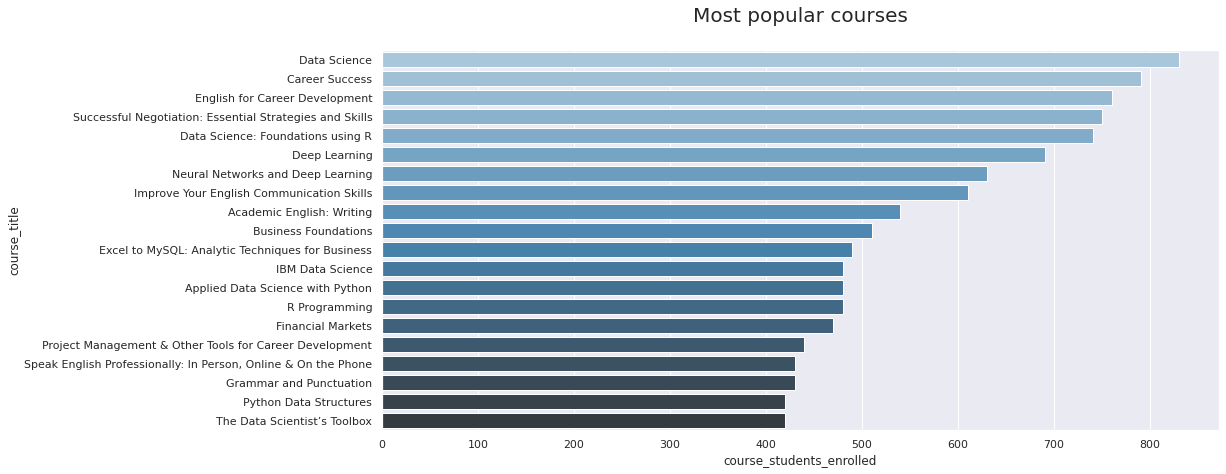

In [11]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='course_students_enrolled', y='course_title', data=dataFrame[dataFrame['course_students_enrolled'] > 400].sort_values(by='course_students_enrolled', ascending=False), palette='Blues_d')
plt.title('Most popular courses\n', fontsize=20)
plt.show()

Above are courses with the most number of students enrolled in them.

Group the data by the course organization and count the number of students enrolled in each organization and pick the top 10


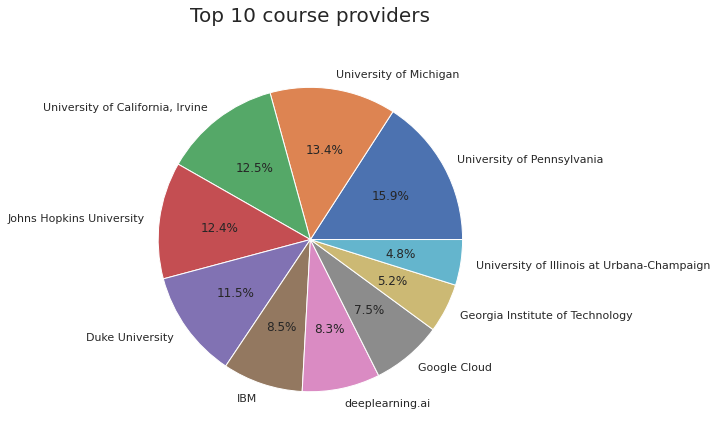

In [12]:
sns.set(rc={'figure.figsize':(15,7)})
plt.pie(dataFrame.groupby('course_organization')['course_students_enrolled'].sum().sort_values(ascending=False).head(10), 
        labels=dataFrame.groupby('course_organization')['course_students_enrolled'].sum().sort_values(ascending=False).head(10).index, 
        autopct='%1.1f%%')
plt.title('Top 10 course providers\n', fontsize=20)
plt.show()

Here are Course organizations with thier number of courses count here we have displayed the top 10 with thier percentage ownership of the total enrolled students.

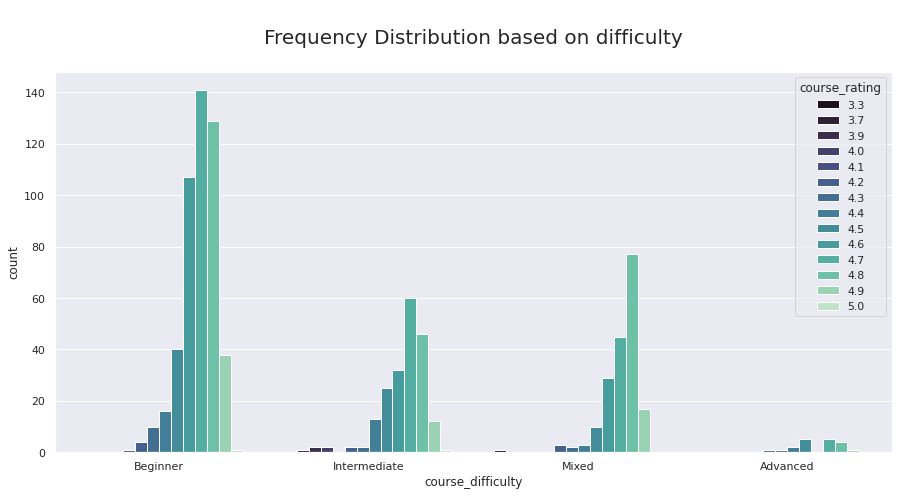

In [13]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=dataFrame, palette="mako")
ax.axes.set_title("\nFrequency Distribution based on difficulty\n",fontsize=20)
plt.show()

Here almost all of the difficulty types have a comparative rating level, eventhough beginner courses have more frequency.

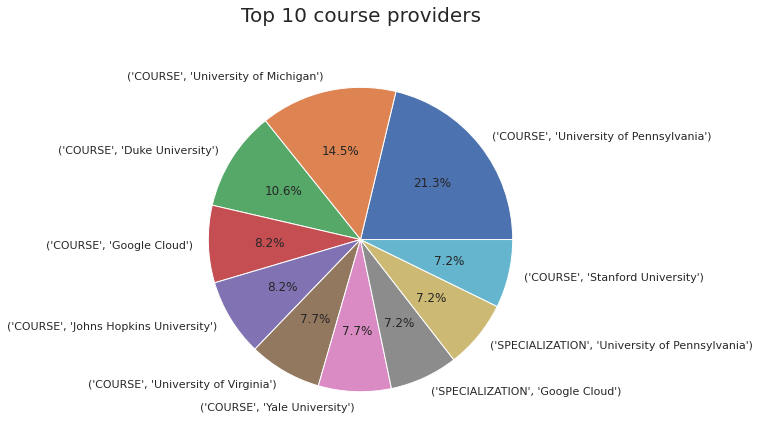

In [14]:
sns.set(rc={'figure.figsize':(15,7)})
plt.pie(dataFrame.groupby('course_Certificate_type')['course_organization'].value_counts().sort_values(ascending=False).head(10), labels=dataFrame.groupby('course_Certificate_type')['course_organization'].value_counts().sort_values(ascending=False).head(10).index, autopct='%1.1f%%')
plt.title('Top 10 course providers\n', fontsize=20)
plt.show()

Here we have brought together the most popular course providers grouped by what type of course they offer, along with how much of the courses they encompass based on percentage.

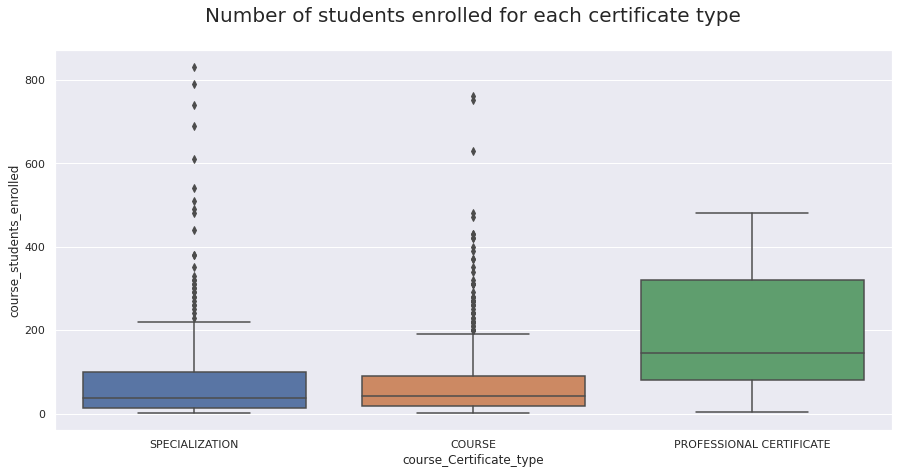

In [15]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x='course_Certificate_type', y='course_students_enrolled', data=dataFrame)
plt.title('Number of students enrolled for each certificate type\n', fontsize=20)
plt.show()

Here we can see that most students are enrolled in personal certification courses rather than spacilaization and course certifications.

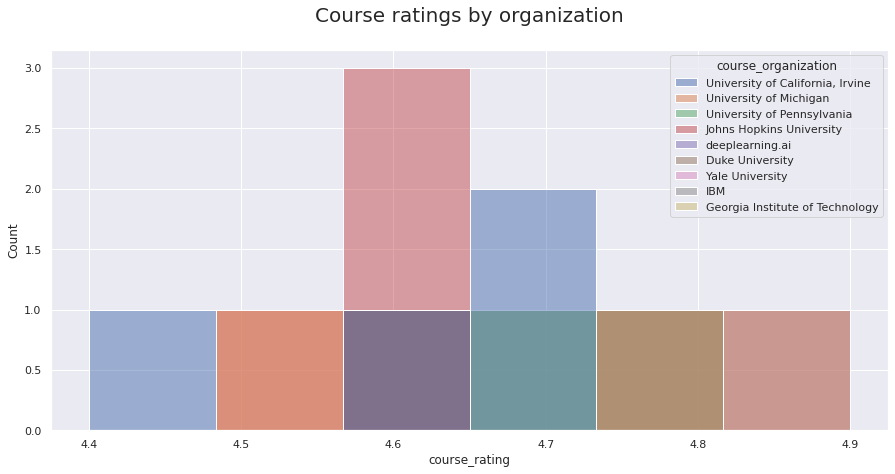

In [16]:
sns.set(rc={'figure.figsize':(15,7)})
altered = dataFrame[dataFrame['course_students_enrolled'] > 400]
sns.histplot(data=altered, x='course_rating', hue='course_organization') 
plt.title('Course ratings by organization\n', fontsize=20)
plt.show()

Out of the popular course providers based on enrollment numbers universities like *Yale University* and *Duke University* offer the highest rated courses.

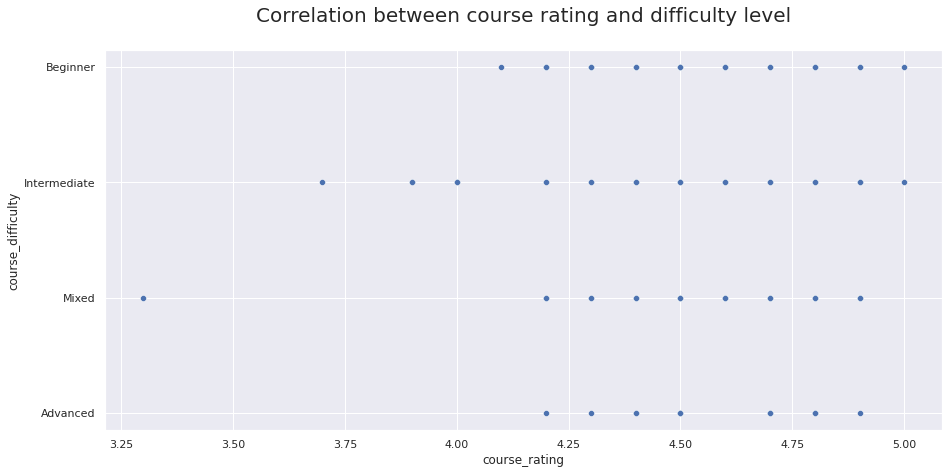

In [17]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='course_rating', y='course_difficulty', data=dataFrame)
plt.title('Correlation between course rating and difficulty level\n', fontsize=20)
plt.show()

From the above visualization we can infer that most courses in this data set have ratings of above 4.25. We also encounter some low ratings in the intermediate courses.

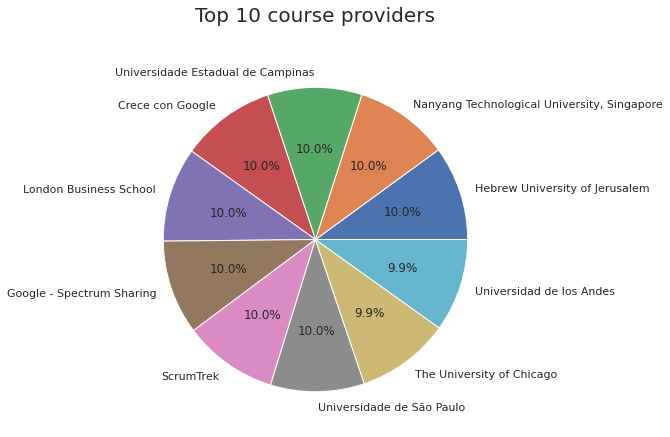

In [18]:
sns.set(rc={'figure.figsize':(15,7)})
plt.pie(dataFrame.groupby('course_organization')['course_rating'].mean().sort_values(ascending=False).head(10), labels=dataFrame.groupby('course_organization')['course_rating'].mean().sort_values(ascending=False).head(10).index, autopct='%1.1f%%')
plt.title('Top 10 course providers\n', fontsize=20)
plt.show()

Here are the most rated course providers and their percentage of ownership.

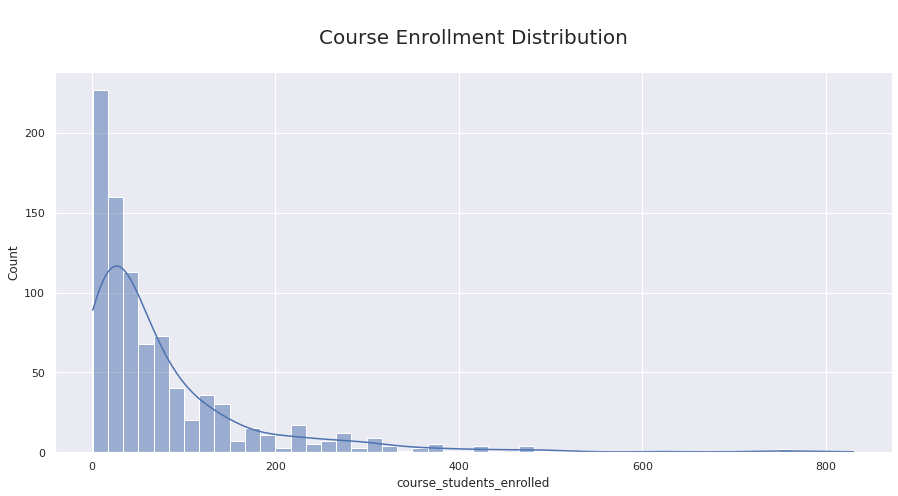

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(dataFrame['course_students_enrolled'], kde=True)
plt.title("\nCourse Enrollment Distribution\n",fontsize=20)
plt.show()

Here we can see very few courses have an enrollment number of greater than 200K.

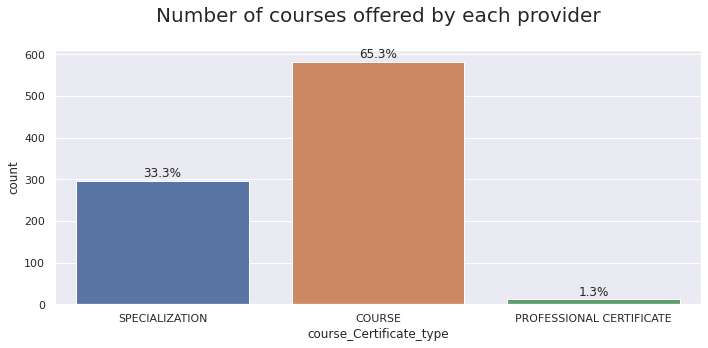

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.countplot(x='course_Certificate_type', data=dataFrame)
plt.title('Number of courses offered by each provider\n', fontsize=20)
total = len(dataFrame)
for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Course certification type has the most number enrolled students

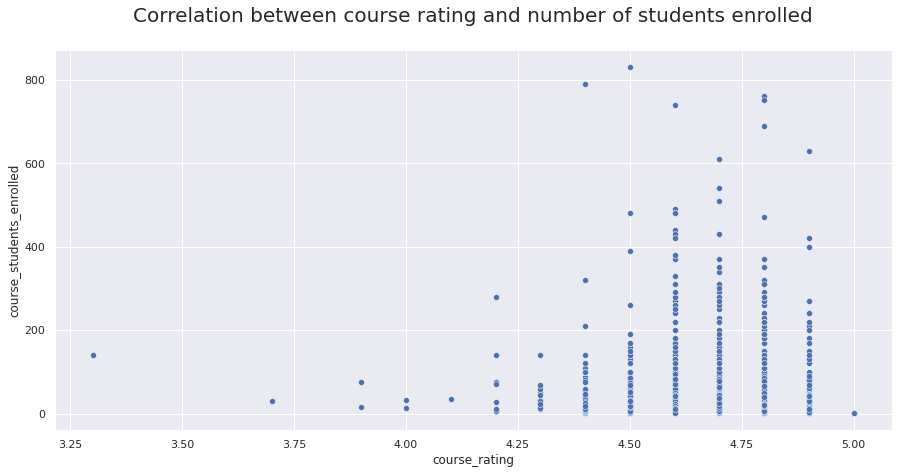

In [21]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='course_rating', y='course_students_enrolled', data=dataFrame)
plt.title('Correlation between course rating and number of students enrolled\n', fontsize=20)
plt.show()

We can see here that the most rated courses are the ones with the most number of students enrolled, but on the other hand we can also infer there are not many courses above the enrollment number of above 400k.

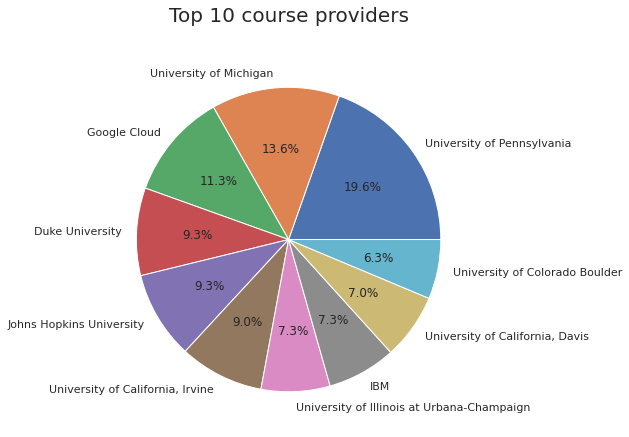

In [22]:
sns.set(rc={'figure.figsize':(15,7)})
plt.pie(dataFrame.groupby('course_organization')['course_title'].count().sort_values(ascending=False).head(10), 
        labels=dataFrame.groupby('course_organization')['course_title'].count().sort_values(ascending=False).head(10).index, autopct='%1.1f%%')
plt.title('Top 10 course providers\n', fontsize=20)
plt.show()

Here I have picked the top 10 course providers in terms of number of courses provided and here is also thier percentage share.

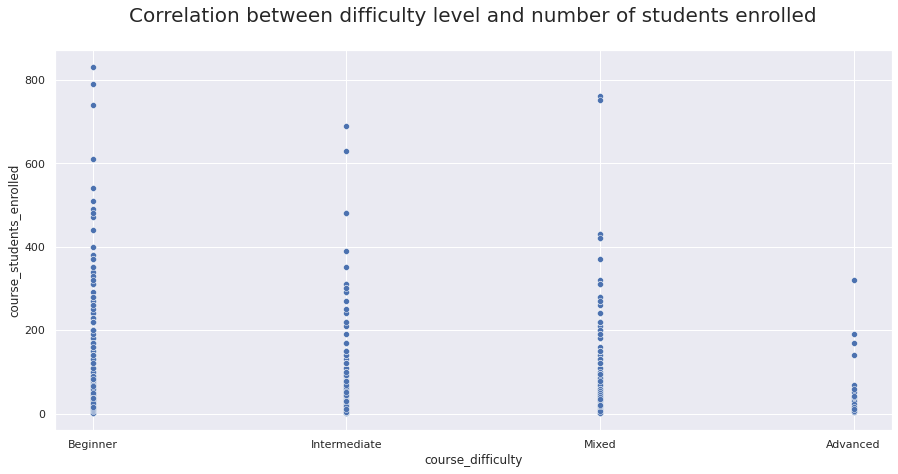

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='course_difficulty', y='course_students_enrolled', data=dataFrame)
plt.title('Correlation between difficulty level and number of students enrolled\n', fontsize=20)
plt.show()

Eventhough most students are enrolled in total in beginner level courses we can see that most difficulty levels comprise an even distribution when we are talking about ratings of below 400K.

**Next we will try to generate the most popular course keywords**

Create a list of all the keywords used in course titles

In [24]:
def keywordGenerator(title):
    keywords = []
    non_keywords = ["Course", "Introduction", "Fundamentals"]
    for word in title.split():
        if word in non_keywords:
          continue
        if word[0].isupper() and len(word) > 3:
            keywords.append(word)
    return keywords

keywords = []
for title in dataFrame['course_title']:
    keywords.extend(keywordGenerator(title))

Create a dictionary of the keywords and their frequency

In [25]:
keywords_dict = {}
for word in keywords:
    if word in keywords_dict:
        keywords_dict[word] += 1
    else:
        keywords_dict[word] = 1

Create a dataframe of the keywords and their frequency and sort the dataframe by the frequency of the keywords


In [26]:
keywords_df = pd.DataFrame.from_dict(keywords_dict, orient='index', columns=['frequency'])
keywords_df = keywords_df.sort_values(by='frequency', ascending=False)

Plot the results

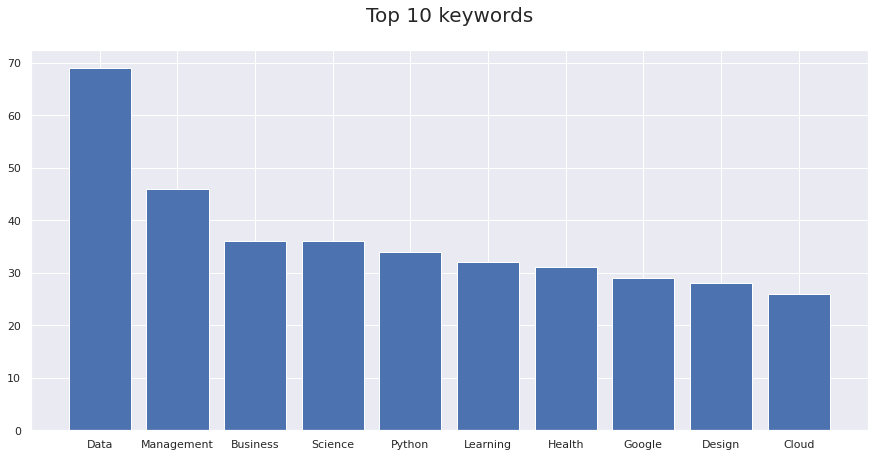

In [27]:
sns.set(rc={'figure.figsize':(15,7)})
plt.bar(keywords_df.head(10).index, keywords_df.head(10)['frequency'])
plt.title('Top 10 keywords\n', fontsize=20)
plt.show()

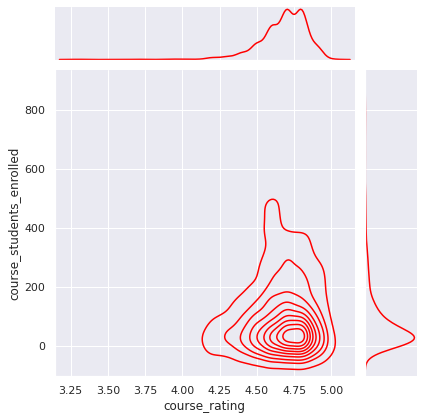

In [28]:
sns.set(rc={'figure.figsize':(15,7)})
sns.jointplot(x='course_rating', y='course_students_enrolled', data=dataFrame, kind='kde', color='red')
plt.show()

We see that there are more students enrolled in the range of < 200K enrolled students and ratings are packed around 4.5 to 5.00 around that same data value.

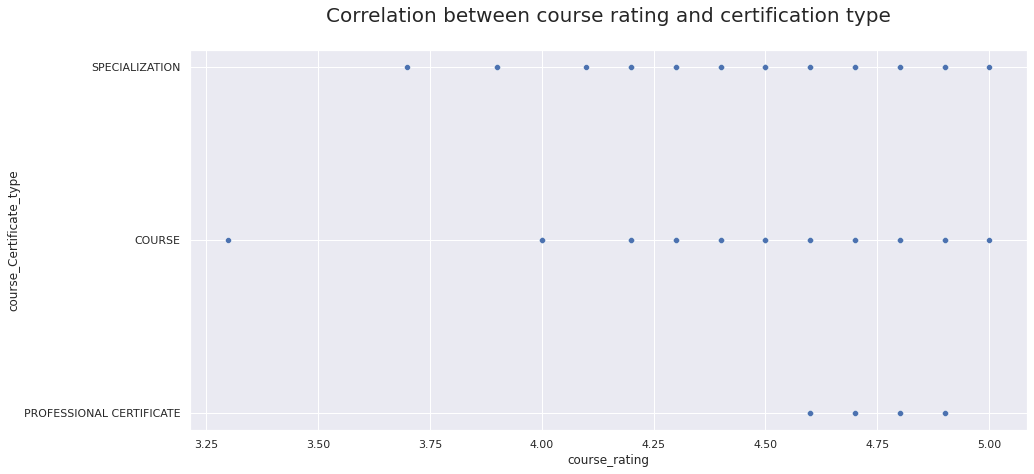

In [29]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='course_rating', y='course_Certificate_type', data=dataFrame)
plt.title('Correlation between course rating and certification type\n', fontsize=20)
plt.show()

Professional certificate courses are by far the most highest rated courses compared to other certificate types.

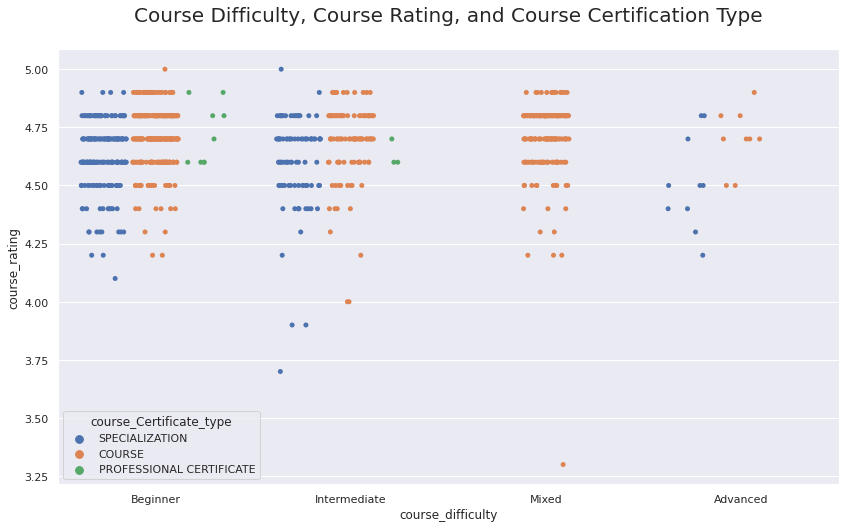

In [30]:
sns.set(rc={'figure.figsize':(15,7)})
plt.figure(figsize = [14,8])
sns.stripplot(data = dataFrame , x = 'course_difficulty',y = 'course_rating', hue = 'course_Certificate_type',jitter = 0.35 , dodge = True)
plt.title('Course Difficulty, Course Rating, and Course Certification Type\n', fontsize=20)
plt.show()

The above visualization can summerize a lot of insights for us:


1.   Mixed difficulties only contain COURSE type certifications
2.   Amazingly Advanced courses do not provide professional certificate coureses.

3.   Majority of the courses have a raing of above 4.0
4.   Overall raings are comapatively equal among both course difficulty and course certification type.





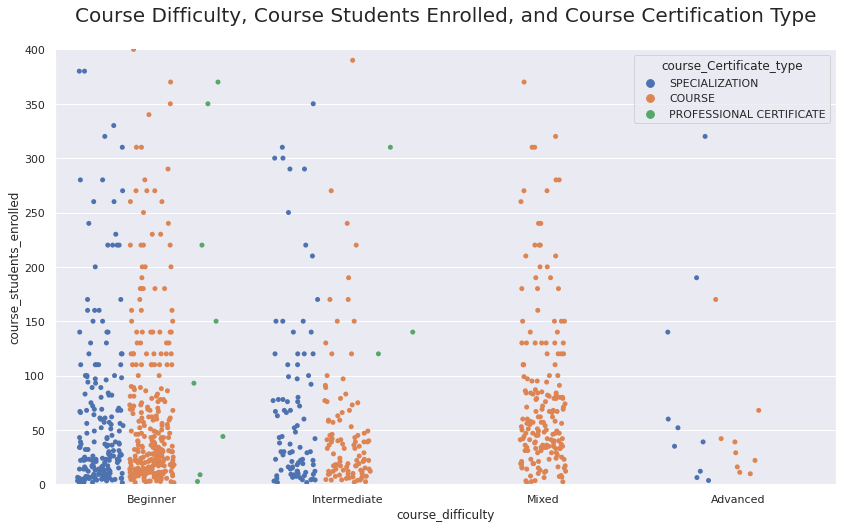

In [31]:
sns.set(rc={'figure.figsize':(15,7)})
plt.figure(figsize = [14,8])
sns.stripplot(data = dataFrame , x = 'course_difficulty',y = 'course_students_enrolled', hue = 'course_Certificate_type',jitter = 0.35 , dodge = True)
plt.ylim([0,400])
plt.title('Course Difficulty, Course Students Enrolled, and Course Certification Type\n', fontsize=20)
plt.show()

Here some takeaways from the above visualization:


1.   Advanced courses have a lesser number of people enrolled
2.   Advanced courses don't have number of students enrolled above 200K
3.   Number of students enrolled for the course difficulties other than advanced courses is pretty nuch close to each other.
4.   Looks like beginner courses have an enrollment number of above 300K with the most frequency and the most diverse certificate type.

